In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, naive_bayes
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
sns.set_style("whitegrid")

#set warning 
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [2]:
filename = "tiktokfix.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,label
0,8c029d6c-9282-4034-9838-53f957384007,Amin Santoso,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5,622,1
1,5be47d92-8ede-4f9a-a613-3107e9bfbde2,monica hsu,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya suka dengan aplikasi tiktok dan aktif men...,5,1332,1
2,a8d020fa-07ac-46e1-9ec1-9a1d6b24abec,Oppo A16,https://play-lh.googleusercontent.com/a/ACg8oc...,Maaf saya kasih ð 2 karena aplikasi nya kur...,2,30,0
3,26fbfb0b-c11b-46e5-8e8b-d9a2803615ee,Verdi Ximenes,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok nya sangat bagus tapi pas di buka video...,3,57,1
4,07d94c25-28a3-4b6d-a404-720513cf1c9a,Nenk shinta,https://play-lh.googleusercontent.com/a-/ALV-U...,Kenapa dengan tiktok saya pas buka muter muter...,2,1799,0


In [3]:
df.drop(columns = ['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'label'], inplace = True)
df.columns = ['content', 'score']
df.head()

,content,score
0,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5
1,Saya suka dengan aplikasi tiktok dan aktif men...,5
2,Maaf saya kasih ð 2 karena aplikasi nya kur...,2
3,Tiktok nya sangat bagus tapi pas di buka video...,3
4,Kenapa dengan tiktok saya pas buka muter muter...,2


In [4]:
import string
import re

In [5]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['content'].apply(lambda x: clean_text(x))
df['label'] = df['score'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

In [6]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['content_len'] = df['content'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['content'].apply(lambda x: count_punct(x))
df.head()

,content,score,cleaned_text,label,content_len,punct
0,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5,tiktok sangat bagus bisa berkarya dan mendapa...,1,196,1.5
1,Saya suka dengan aplikasi tiktok dan aktif men...,5,saya suka dengan aplikasi tiktok dan aktif men...,1,323,2.8
2,Maaf saya kasih ð 2 karena aplikasi nya kur...,2,maaf saya kasih karena aplikasi nya kur...,0,107,0.0
3,Tiktok nya sangat bagus tapi pas di buka video...,3,tiktok nya sangat bagus tapi pas di buka video...,0,128,1.6
4,Kenapa dengan tiktok saya pas buka muter muter...,2,kenapa dengan tiktok saya pas buka muter muter...,0,117,0.9


In [7]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,content,score,cleaned_text,label,content_len,punct,tokens
0,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5,tiktok sangat bagus bisa berkarya dan mendapa...,1,196,1.5,"[tiktok, sangat, bagus, bisa, berkarya, dan, m..."
1,Saya suka dengan aplikasi tiktok dan aktif men...,5,saya suka dengan aplikasi tiktok dan aktif men...,1,323,2.8,"[saya, suka, dengan, aplikasi, tiktok, dan, ak..."
2,Maaf saya kasih ð 2 karena aplikasi nya kur...,2,maaf saya kasih karena aplikasi nya kur...,0,107,0.0,"[maaf, saya, kasih, karena, aplikasi, nya, kur..."
3,Tiktok nya sangat bagus tapi pas di buka video...,3,tiktok nya sangat bagus tapi pas di buka video...,0,128,1.6,"[tiktok, nya, sangat, bagus, tapi, pas, di, bu..."
4,Kenapa dengan tiktok saya pas buka muter muter...,2,kenapa dengan tiktok saya pas buka muter muter...,0,117,0.9,"[kenapa, dengan, tiktok, saya, pas, buka, mute..."


In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('indonesian')
all_stopwords.remove('tidak')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_content'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,content,score,cleaned_text,label,content_len,punct,tokens,lemmatized_content
0,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5,tiktok sangat bagus bisa berkarya dan mendapa...,1,196,1.5,"[tiktok, sangat, bagus, bisa, berkarya, dan, m...",tiktok bagus berkarya teman daerah beruntung m...
1,Saya suka dengan aplikasi tiktok dan aktif men...,5,saya suka dengan aplikasi tiktok dan aktif men...,1,323,2.8,"[saya, suka, dengan, aplikasi, tiktok, dan, ak...",suka aplikasi tiktok aktif menggunakannya kece...
2,Maaf saya kasih ð 2 karena aplikasi nya kur...,2,maaf saya kasih karena aplikasi nya kur...,0,107,0.0,"[maaf, saya, kasih, karena, aplikasi, nya, kur...",maaf kasih aplikasi nya bagus jaringan full kl...
3,Tiktok nya sangat bagus tapi pas di buka video...,3,tiktok nya sangat bagus tapi pas di buka video...,0,128,1.6,"[tiktok, nya, sangat, bagus, tapi, pas, di, bu...",tiktok nya bagus pa buka video nya nonton tida...
4,Kenapa dengan tiktok saya pas buka muter muter...,2,kenapa dengan tiktok saya pas buka muter muter...,0,117,0.9,"[kenapa, dengan, tiktok, saya, pas, buka, mute...",tiktok pa buka muter muter wifi penuh gambar n...


In [10]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"score 1 = {len(df[df['score']==1])} rows")
print(f"score 2 = {len(df[df['score']==2])} rows")
print(f"score 3 = {len(df[df['score']==3])} rows")
print(f"score 4 = {len(df[df['score']==4])} rows")
print(f"score 5 = {len(df[df['score']==5])} rows")

Input data has 397 rows and 8 columns
score 1 = 123 rows
score 2 = 28 rows
score 3 = 48 rows
score 4 = 32 rows
score 5 = 166 rows


Number of null in label: 0
Number of null in text: 0


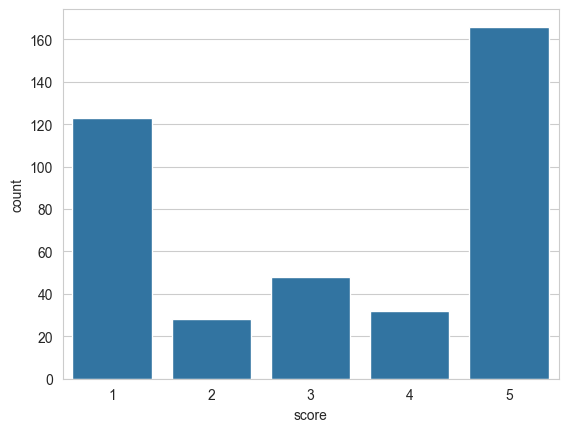

In [11]:
# Missing values in the dataset
print(f"Number of null in label: { df['score'].isnull().sum() }")
print(f"Number of null in text: { df['content'].isnull().sum()}")
sns.countplot(x='score', data=df);

In [12]:
from wordcloud import WordCloud

In [13]:
df_negative = df[ (df['score']==1) | (df['score']==2) | (df['score']==3)]
df_positive = df[ (df['score']==4) | (df['score']==5)]
#convert to list
negative_list=df_negative['lemmatized_content'].tolist()
positive_list= df_positive['lemmatized_content'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

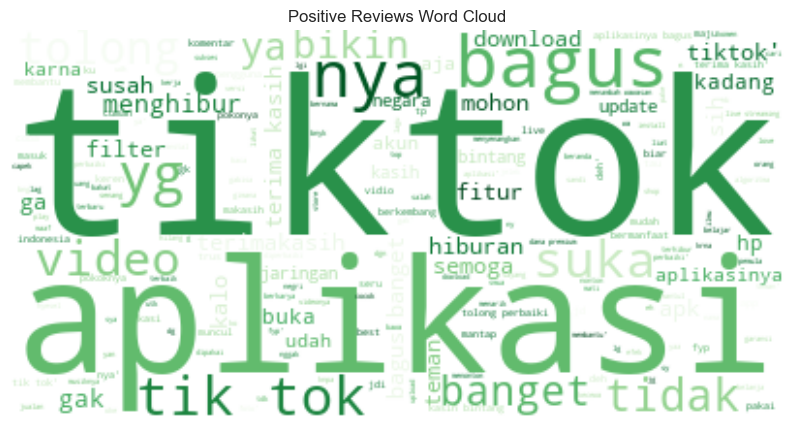

In [14]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

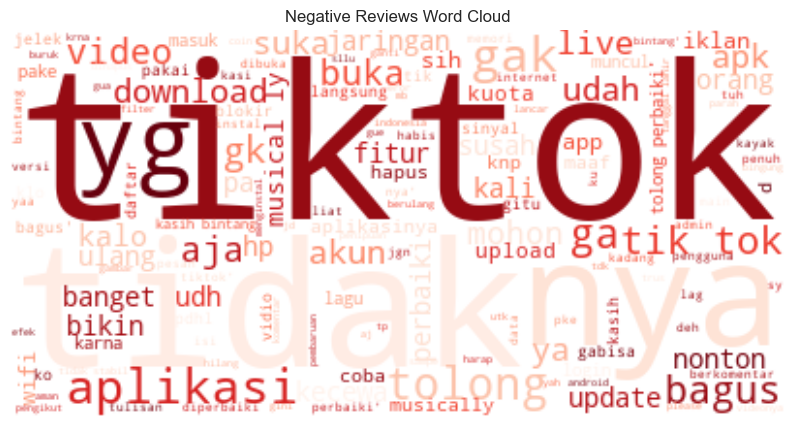

In [15]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

In [16]:
X = df[['lemmatized_content', 'content_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(397, 3)
(397,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(277, 3)
(120, 3)
(277,)
(120,)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_content'])
tfidf_test = tfidf.transform(X_test['lemmatized_content'])

X_train_vect = pd.concat([X_train[['content_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['content_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()  

,content_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,18,5.6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,43,2.3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.465272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.59      0.65      0.62        62
           1       0.58      0.52      0.55        58

    accuracy                           0.58       120
   macro avg       0.58      0.58      0.58       120
weighted avg       0.58      0.58      0.58       120



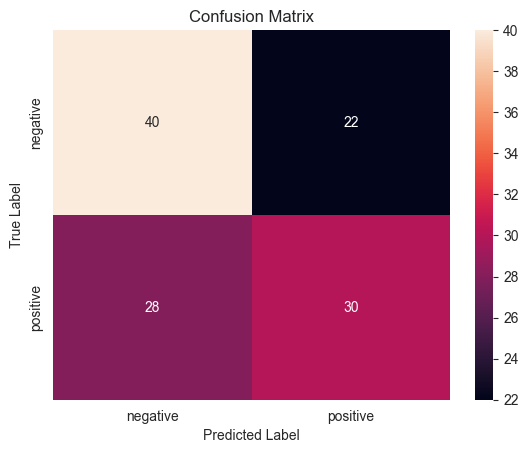

In [20]:
# Convert all column names to strings
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
# Use the vectorized training data with numerical features
classifier.fit(X_train_vect, y_train)  
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
         ]
names = ["Naive Bayes"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.6316137566137565 
 precision - 0.6631118881118881 
 recall - 0.5571428571428572 
 f1 - 0.5923330386089007 

